# A Basic Example: Modeling a Simple Dipole Antenna
Demonstrates the simulation of a dipole over ground, and displaying some results.

In [24]:
# The file necutil.py contains various functions for simulation and display
# You'll have to edit this file with the location of your licensed NEC5 executable
from necutil import nec5_sim_stdio3, plot_vswr, plot_azimuth2, plot_elevation


# Create a simple NEC design:
#  dipole designed for 14.1 MHz using familiar 468/freq design equation
#  MININEC ground
#  compute feedpoint impedance in band 14.0 - 15.0 MHz
#  
necdeck = '\n'.join(
    ['CE Dipole',               # Comment
     'GW 1 20 0 -5.06 20 0 5.06 20 .001',   # Wire element, 20 segments, from (0,-5.06,20) to (0,5.06,20)  (lengths in meters)
     'GE 1 0',                  # End of geometry; ground plane specified
     'GD 0 0 0 0 13 0.005 0 0', # Some typical MININEC ground parameters
     'EX 4 1 10 2 1.0 0.0',     # Excitation: current source (1A), tag=1, segment=10, far end=2
     'FR 0 11 0 0 14.0 0.1',    # Frequencies for XQ card: 14.0 - 15.0 MHz
     'XQ 0',                    # Simulate feedpoint impedance
     'FR 0 1 0 0 14.1 0',       # Frequency for RP card: 14.1 MHz
     'RP 0 91 361 0000 0 0 1 1',    # Simulate radiation pattern on 1deg grid
     'EN\n'                     # End
    ])


In [25]:
# Run the simulation
# Returns a nested list of simulation data for one or more designs
result = nec5_sim_stdio3([necdeck])


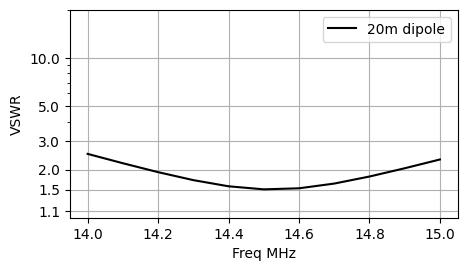

In [26]:
# Display VSWR with 50ohm transmission line
plot_vswr(result[0][0], ['20m dipole'])

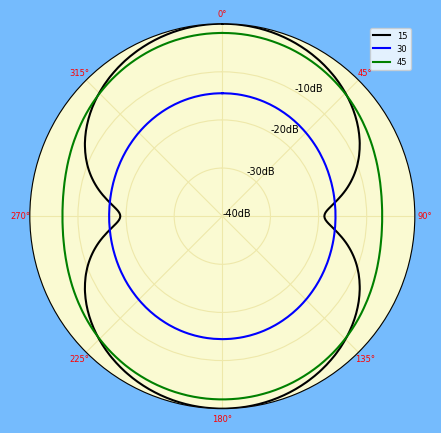

In [29]:
# Azimuthal radiation pattern at three elevations
rparr = result[0][1][0][0][1]       # Rad pattern array returned from simulation
plot_azimuth2([rparr]*3, [15,30,45], ['15','30','45'])

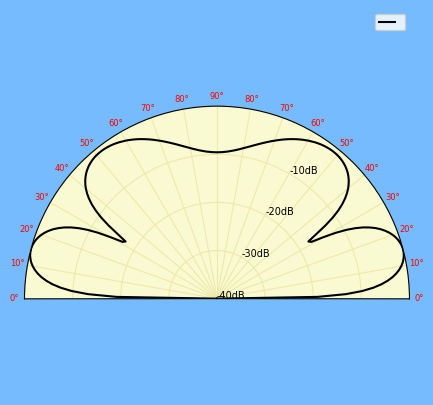

In [28]:
# Elevation radiation pattern
plot_elevation([rparr], [''])